In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
import statsmodels.api as sm
import itertools
import time
import os

C:\Users\jihun\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)
C:\Users\jihun\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [6]:
os.getcwd()

'C:\\Users\\jihun\\Desktop\\github\\py-study\\Statistics'

In [37]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet

In [38]:
ploan = pd.read_csv('./Personal Loan.csv')
ploan_processed = ploan.dropna().drop(['ID','ZIP Code'],axis=1, inplace=False)


feature_columns = list(ploan_processed.columns.difference(['Personal Loan']))
x = ploan_processed[feature_columns]
y = ploan_processed['Personal Loan']

train_x, test_x, train_y, test_y = train_test_split(x, y, stratify=y, train_size=0.7, test_size=0.3, random_state=42)
print(train_x.shape, test_x.shape, train_y.shape, test_y.shape)

(1750, 11) (750, 11) (1750,) (750,)


In [56]:
# Lasso 적합
ll = Lasso(alpha=0.01)  # 알파값이 커질수록 0으로 가까워진다  크면 별로 안좋음 0으로 많이나온다
# 알파값 0.1, 0.01로 해보기
ll.fit(train_x, train_y)

Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [57]:
# 회귀계수 출력
ll.coef_

array([ 0.00000000e+00,  2.04783983e-03,  1.14390390e-01, -0.00000000e+00,
        6.58342418e-02,  4.76625359e-04,  3.13396711e-02,  3.55393865e-03,
        1.31719530e-05,  0.00000000e+00, -0.00000000e+00])

In [58]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          Personal Loan   No. Observations:                 1750
Model:                          Logit   Df Residuals:                     1739
Method:                           MLE   Df Model:                           10
Date:                Wed, 01 Jan 2020   Pseudo R-squ.:                  0.5829
Time:                        22:06:25   Log-Likelihood:                -240.91
converged:                       True   LL-Null:                       -577.63
                                        LLR p-value:                3.141e-138
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Age                   -0.4909      0.037    -13.301      0.000      -0.563      -0.419
CCAvg                  0.0847      0.062      1.377      0.169      -0.036       0.205
CD Account             4.3491      0.552      7.874      0.000       3.267       5.432
CreditCard            -1.2678      0.326     -3.889      0.000      -1.907      -0.629
Education              1.5138      0.180      8.406      0.000       1.161       1.867
Experience             0.4987      0.042     11.860      0.000       0.416       0.581
Family                 0.7013      0.120      5.820      0.000       0.465       0.937
Income                 0.0506      0.004     12.583      0.000       0.043       0.058
Mortgage            -4.42e-05      0.001     -0.048      0.962      -0.002       0.002
Online                -0.5527      0.256     -2.159      0.031      -1.054      -0.051
Securities Account    -1.8812      0.548     -3.436      0.001      -2.954      -0.808
======================================================================================
"""

In [59]:
pred_y_lasso = ll.predict(test_x)
pred_Y_lasso = cut_off(pred_y_lasso, 0.5)
cfmat = confusion_matrix(test_y, pred_Y_lasso)
print(acc(cfmat))

0.936


AUC :  0.9439995368672931


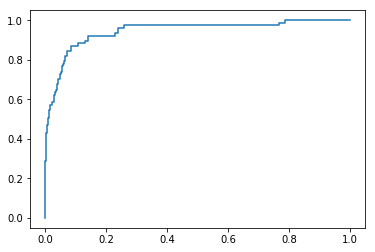

In [60]:
# sklearn ROC 패키지 제공
fpr, tpr, thresholds = metrics.roc_curve(test_y, pred_y_lasso, pos_label=1)

plt.plot(fpr, tpr)

auc = np.trapz(tpr, fpr)
print('AUC : ', auc)

In [61]:
# Ridge 적합
rr = Ridge(alpha = 0.01)
rr.fit(train_x, train_y)

Ridge(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [62]:
rr.coef_

array([-3.71283678e-03,  7.37570775e-03,  3.54973975e-01, -5.28579506e-02,
        7.83404224e-02,  4.12823466e-03,  3.62504712e-02,  3.27385112e-03,
        1.73105480e-06, -1.91297381e-02, -8.77388670e-02])

In [63]:
ll.coef_
# lasso는 회귀계수를 0으로 만들어버리지만 ridge는 0에 가깝게 만든다.

array([ 0.00000000e+00,  2.04783983e-03,  1.14390390e-01, -0.00000000e+00,
        6.58342418e-02,  4.76625359e-04,  3.13396711e-02,  3.55393865e-03,
        1.31719530e-05,  0.00000000e+00, -0.00000000e+00])

In [66]:
pred_y_ridge = rr.predict(test_x)
pred_Y_ridge = cut_off(pred_y_ridge, 0.5)
cfmat = confusion_matrix(test_y, pred_Y_ridge)
print(acc(cfmat))

0.932


AUC :  0.9494992377607533


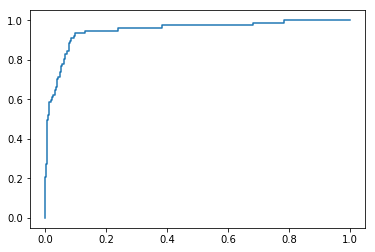

In [67]:
# sklearn ROC 패키지 제공
fpr, tpr, thresholds = metrics.roc_curve(test_y, pred_y_ridge, pos_label=1)

plt.plot(fpr, tpr)

auc = np.trapz(tpr, fpr)
print('AUC : ', auc)

In [ ]:
# lambda 값에 따른 회귀계수 / accuracy 계산

In [ ]:
## lambda값 0.001 ~ 10끼지 범위 설정

In [11]:
ploan_processed = ploan.dropna().drop(['ID','ZIP Code'],axis=1, inplace=False)

In [12]:
ploan_processed = sm.add_constant(ploan_processed, has_constant='add')
ploan_processed.head()

C:\Users\jihun\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


,const,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1.0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,1.0,45,19,34,3,1.5,1,0,0,1,0,0,0
2,1.0,39,15,11,1,1.0,1,0,0,0,0,0,0
3,1.0,35,9,100,1,2.7,2,0,0,0,0,0,0
4,1.0,35,8,45,4,1.0,2,0,0,0,0,0,1


In [17]:
feature_columns = list(ploan_processed.columns.difference(['Personal Loan']))
x = ploan_processed[feature_columns]
y = ploan_processed['Personal Loan']

In [19]:
train_x, test_x, train_y, test_y = train_test_split(x, y, stratify=y, train_size=0.7, test_size=0.3, random_state=42)
print(train_x.shape, test_x.shape, train_y.shape, test_y.shape)

(1750, 12) (750, 12) (1750,) (750,)


# 로지스틱회귀모형 모델링 y=f(x)

In [46]:
model = sm.Logit(train_y, train_x)
results = model.fit(method='newton')

Optimization terminated successfully.
         Current function value: 0.137663
         Iterations 9


In [47]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          Personal Loan   No. Observations:                 1750
Model:                          Logit   Df Residuals:                     1739
Method:                           MLE   Df Model:                           10
Date:                Wed, 01 Jan 2020   Pseudo R-squ.:                  0.5829
Time:                        22:01:36   Log-Likelihood:                -240.91
converged:                       True   LL-Null:                       -577.63
                                        LLR p-value:                3.141e-138
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Age                   -0.4909      0.037    -13.301      0.000      -0.563      -0.419
CCAvg                  0.0847      0.062      1.377      0.169      -0.036       0.205
CD Account             4.3491      0.552      7.874      0.000       3.267       5.432
CreditCard            -1.2678      0.326     -3.889      0.000      -1.907      -0.629
Education              1.5138      0.180      8.406      0.000       1.161       1.867
Experience             0.4987      0.042     11.860      0.000       0.416       0.581
Family                 0.7013      0.120      5.820      0.000       0.465       0.937
Income                 0.0506      0.004     12.583      0.000       0.043       0.058
Mortgage            -4.42e-05      0.001     -0.048      0.962      -0.002       0.002
Online                -0.5527      0.256     -2.159      0.031      -1.054      -0.051
Securities Account    -1.8812      0.548     -3.436      0.001      -2.954      -0.808
======================================================================================
"""

In [25]:
print("model AIC: ", "{:.5f}".format(results.aic))

model AIC:  482.69329


In [26]:
results.params

Age                    0.024471
CCAvg                  0.098468
CD Account             4.372577
CreditCard            -1.237447
Education              1.520329
Experience            -0.007032
Family                 0.757911
Income                 0.054695
Mortgage              -0.000133
Online                -0.440746
Securities Account    -1.852006
const                -13.920298
dtype: float64

In [28]:
np.exp(results.params)

Age                   1.024773e+00
CCAvg                 1.103479e+00
CD Account            7.924761e+01
CreditCard            2.901239e-01
Education             4.573729e+00
Experience            9.929928e-01
Family                2.133814e+00
Income                1.056218e+00
Mortgage              9.998665e-01
Online                6.435563e-01
Securities Account    1.569221e-01
const                 9.005163e-07
dtype: float64

In [29]:
pred_y = results.predict(test_x)
pred_y

1065    0.012968
487     0.023841
2157    0.001210
1765    0.196245
525     0.006610
1573    0.241812
2103    0.060656
1601    0.339803
1329    0.002238
970     0.003269
875     0.004334
661     0.000976
1356    0.001064
1454    0.084981
838     0.026756
2042    0.010442
1401    0.038788
2025    0.006997
1475    0.091474
969     0.032079
2268    0.004988
456     0.004391
1685    0.017692
1702    0.014201
102     0.005766
1712    0.001604
1280    0.141404
2470    0.612456
2433    0.435395
2326    0.015946
          ...   
1120    0.001546
689     0.000588
70      0.004755
2483    0.001897
1067    0.561103
1123    0.472680
1166    0.145754
1572    0.002263
227     0.836443
1127    0.000111
812     0.036772
2184    0.977346
998     0.016186
828     0.000613
2104    0.063208
1135    0.000021
2434    0.003421
451     0.008169
1286    0.001812
1364    0.009835
1827    0.010325
2093    0.073346
168     0.000349
2062    0.046096
107     0.000239
277     0.019982
914     0.959460
542     0.0052

In [31]:
def cut_off(y, threshold):
    Y = y.copy() # copy함수를 사용하여 이전의 y값이 변하지 않도록함
    Y[Y>threshold]=1
    Y[Y<=threshold]=0
    return (Y.astype(int))
pred_Y = cut_off(pred_y,0.5)
len(pred_Y[pred_Y==1])

61

In [32]:
# confusion matrix
cfmat = confusion_matrix(test_y, pred_Y)
print(cfmat)  
# ( N, TP,  그 네개 행렬)

[[661  12]
 [ 28  49]]


In [33]:
def acc(cfmat):
    acc = (cfmat[0,0] + cfmat[1,1]) / (cfmat[0,0] + cfmat[1,1] + cfmat[0,1] + cfmat[1,0])
    return acc
acc(cfmat)

0.9466666666666667

In [34]:
threshold = np.arange(0,1,0.1)
table = pd.DataFrame(columns=['ACC'])
for i in threshold:
    pred_Y = cut_off(pred_y, i)
    cfmat = confusion_matrix(test_y, pred_Y)
    table.loc[i] = acc(cfmat)
table.index.name = 'threshold'
table.columns.name = 'Performance'
table

Performance,ACC
threshold,
0.0,0.102667
0.1,0.908000
0.2,0.922667
0.3,0.933333
0.4,0.934667
0.5,0.946667
0.6,0.949333
0.7,0.946667
0.8,0.941333


AUC :  0.9463923891858513


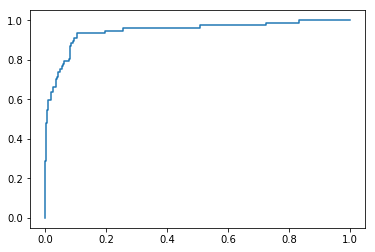

In [36]:
# sklearn ROC 패키지 제공
fpr, tpr, thresholds = metrics.roc_curve(test_y, pred_y, pos_label=1)

plt.plot(fpr, tpr)

auc = np.trapz(tpr, fpr)
print('AUC : ', auc)